In [1]:
import os
import re
import math
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster

from tqdm.auto import tqdm
import utils

from utils.find_travel_time import FindTravelTime
from utils.utils import load_gps_data, get_road_data

In [2]:
gps_data_dir = 'E:'
road_data_dir = 'D:/Travel Time Prediction'
stop_data_dir = 'D:/Travel Time Prediction'

tqdm.pandas(desc='working : ')

In [3]:
df = load_gps_data(gps_data_dir)

In [4]:
df_road = get_road_data(road_data_dir,rd=1)
df_stop = pd.read_csv(stop_data_dir+"/df_stop_1.csv")

In [5]:
tt = FindTravelTime(df)

In [6]:
tt.set_road(1)

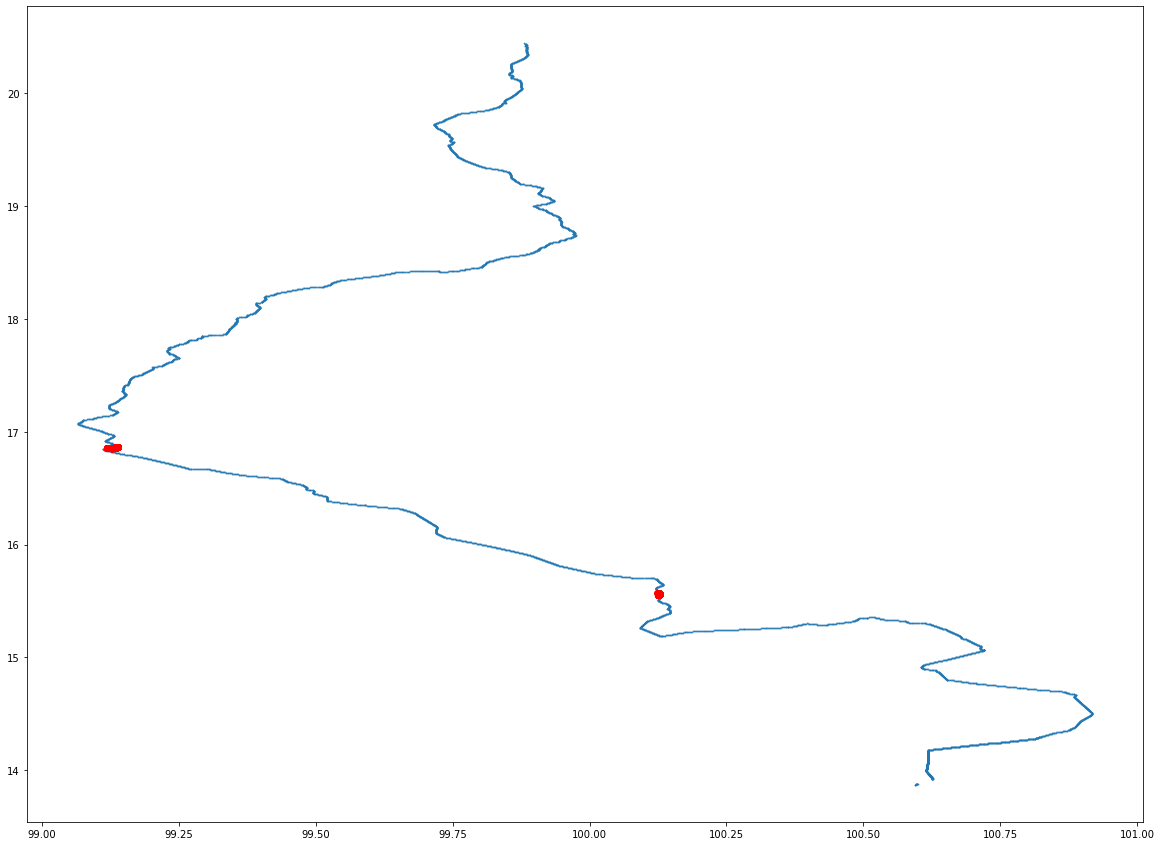

In [7]:
df_road = get_road_data(road_data_dir,rd=1)
tt.plot_filter(df_road)

In [8]:
df_temp1 , df_temp2 = tt.find_travel_time_per_hour()

In [9]:
df_temp1

,time_range,unit_id,lat_0,lon_0,lat_1,lon_1,delta_t
0,0,033000400000864507038857354,15.562444,100.126350,16.862024,99.135933,76194
1,0,005000600000863835024792991,15.568730,100.125720,16.864040,99.138030,79721
2,0,008000300000000001503118001,15.560760,100.126510,16.861120,99.133080,15892
3,0,055000200000357042063161393,15.571540,100.125380,16.855410,99.122060,13431
4,0,005000600000864507030177975,15.563770,100.126290,16.861500,99.134750,81705
...,...,...,...,...,...,...,...
137,19,033000400000864507034781921,15.568383,100.125778,16.855795,99.122841,13200
138,19,001000100000000112560118227,15.553833,100.127283,16.869000,99.134750,14145
139,19,025000200000863835028620636,15.570395,100.125526,16.863683,99.137956,16420
140,19,003000400000863789021996065,15.568022,100.125750,16.863007,99.137168,13260


In [10]:
df_temp2

,time_range,unit_id,lat_0,lon_0,lat_1,lon_1,delta_t
0,0,03600040000000000084120018D,16.855767,99.123267,15.566133,100.126233,13506
1,0,005000800000864507038085386,16.854040,99.119670,15.554340,100.127370,72838
2,0,005000600000863835021092718,16.854350,99.120390,15.565140,100.126320,12246
3,0,048000100000000000000061834,16.857976,99.127770,15.557790,100.127110,10040
4,0,066000200000000003081841579,16.858866,99.129440,15.569627,100.125839,15002
...,...,...,...,...,...,...,...
143,19,005000800000863835029196875,16.857250,99.126230,15.558580,100.127010,12459
144,20,005000600000863835024611522,16.854210,99.119990,15.567330,100.126090,9988
145,20,003000000000354776032114974,16.861643,99.135093,15.555067,100.127333,11230
146,20,0330002000000863835023333052,16.862668,99.137143,15.557301,100.127111,10245


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


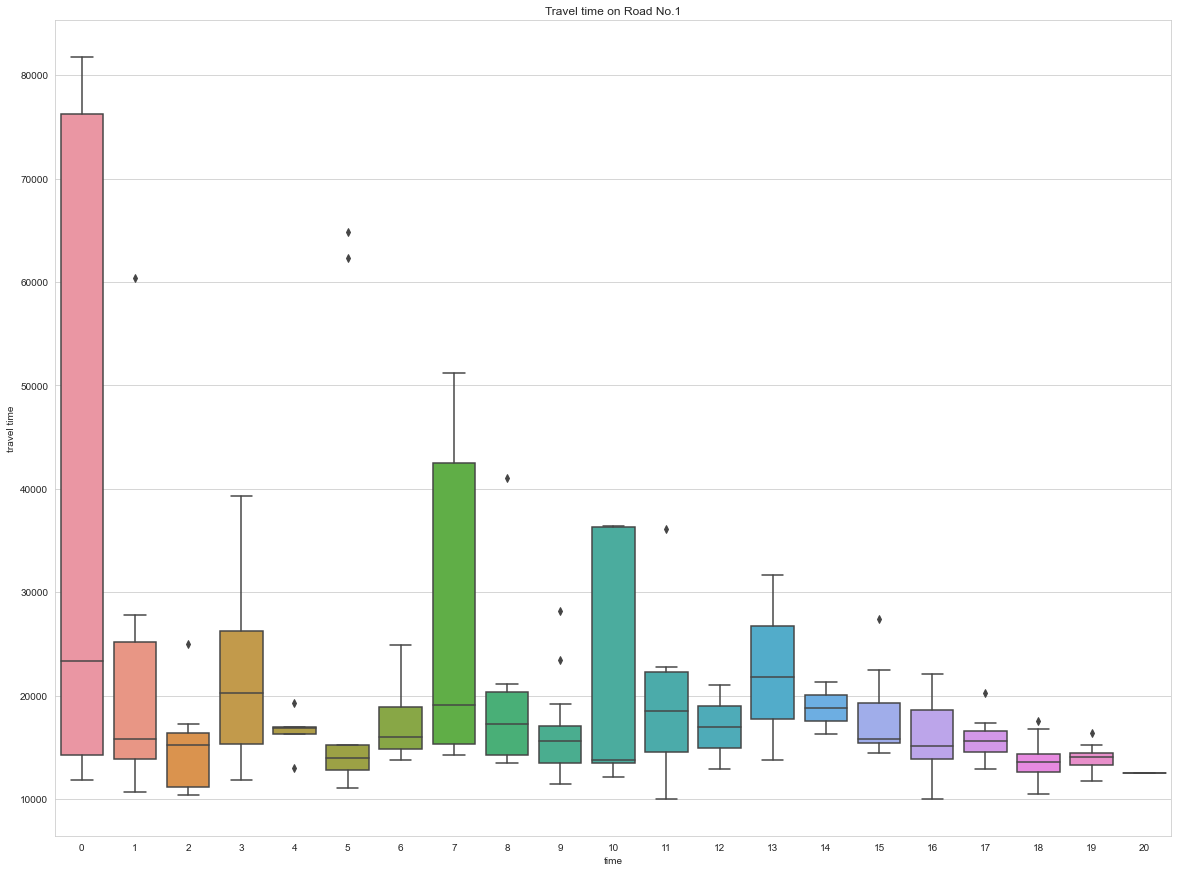

In [40]:
import seaborn as sns 
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.boxplot("time_range", "delta_t", data=df_temp1)
plt.xlabel("time") # Set text for the x axis
plt.ylabel("travel time")# Set text for y axis
plt.title("Travel time on Road No.1")
plt.show()

Text(0, 0.5, 'Travel time')

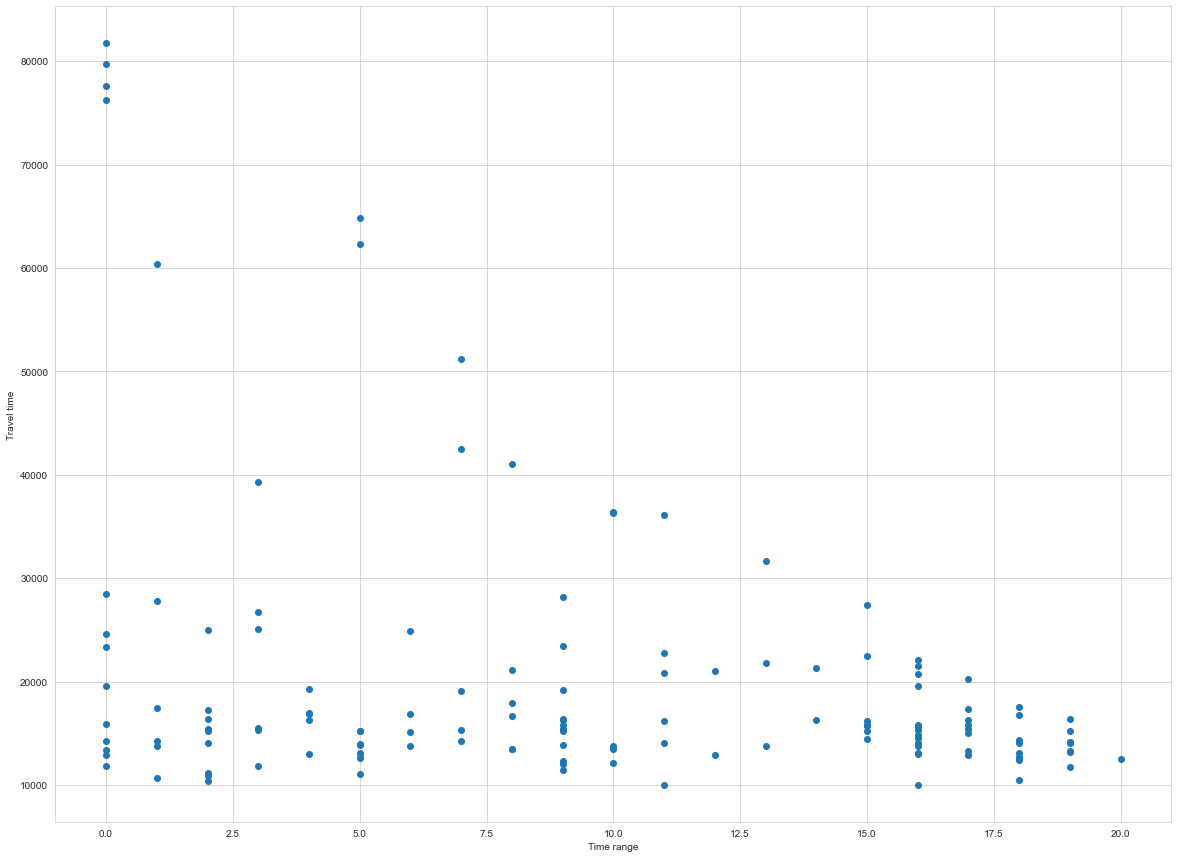

In [12]:
plt.figure(figsize=(20,15))
plt.scatter(df_temp1["time_range"],df_temp1["delta_t"])
plt.xlabel("Time range")
plt.ylabel("Travel time")

In [13]:
df_temp1[df_temp1["time_range"] == 0]

,time_range,unit_id,lat_0,lon_0,lat_1,lon_1,delta_t
0,0,033000400000864507038857354,15.562444,100.126350,16.862024,99.135933,76194
1,0,005000600000863835024792991,15.568730,100.125720,16.864040,99.138030,79721
2,0,008000300000000001503118001,15.560760,100.126510,16.861120,99.133080,15892
3,0,055000200000357042063161393,15.571540,100.125380,16.855410,99.122060,13431
4,0,005000600000864507030177975,15.563770,100.126290,16.861500,99.134750,81705
5,0,003000400000863789021738145,15.571235,100.125495,16.863588,99.138272,77578
6,0,1230001000000INZPIRE0005004,15.568268,100.123920,16.856445,99.124199,12906
7,0,043000300000863835024905734,15.559771,100.126660,16.860773,99.132661,23376
8,0,005000800000863835029165789,15.568040,100.125810,16.854650,99.120480,14298
9,0,003000300000359769033395770,15.552195,100.127412,16.862612,99.136322,19620


In [14]:
df_temp = tt._preprocess()

In [15]:
df_temp[df_temp["unit_id"] == "033000400000864507038857354"]

,time_stamp,unit_id,lat,lon,speed,unit_type,position
0,2019-03-01 00:00:05,033000400000864507038857354,15.562444,100.126350,65,7.0,start
3568,2019-03-01 21:09:59,033000400000864507038857354,16.862024,99.135933,31,7.0,stop


In [16]:
q1 = df_temp1["delta_t"].quantile(0.25)
q3 = df_temp1["delta_t"].quantile(0.75)
iqr = q3-q1 
iqr

7048.5

In [17]:
df_out = df_temp1[(df_temp1["delta_t"] >= (q1 - 1.5 * iqr))  & (df_temp1["delta_t"] <= (q3 + 1.5 * iqr)) ].reset_index(drop=True) 
df_out

,time_range,unit_id,lat_0,lon_0,lat_1,lon_1,delta_t
0,0,008000300000000001503118001,15.560760,100.126510,16.861120,99.133080,15892
1,0,055000200000357042063161393,15.571540,100.125380,16.855410,99.122060,13431
2,0,1230001000000INZPIRE0005004,15.568268,100.123920,16.856445,99.124199,12906
3,0,043000300000863835024905734,15.559771,100.126660,16.860773,99.132661,23376
4,0,005000800000863835029165789,15.568040,100.125810,16.854650,99.120480,14298
...,...,...,...,...,...,...,...
122,19,033000400000864507034781921,15.568383,100.125778,16.855795,99.122841,13200
123,19,001000100000000112560118227,15.553833,100.127283,16.869000,99.134750,14145
124,19,025000200000863835028620636,15.570395,100.125526,16.863683,99.137956,16420
125,19,003000400000863789021996065,15.568022,100.125750,16.863007,99.137168,13260


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


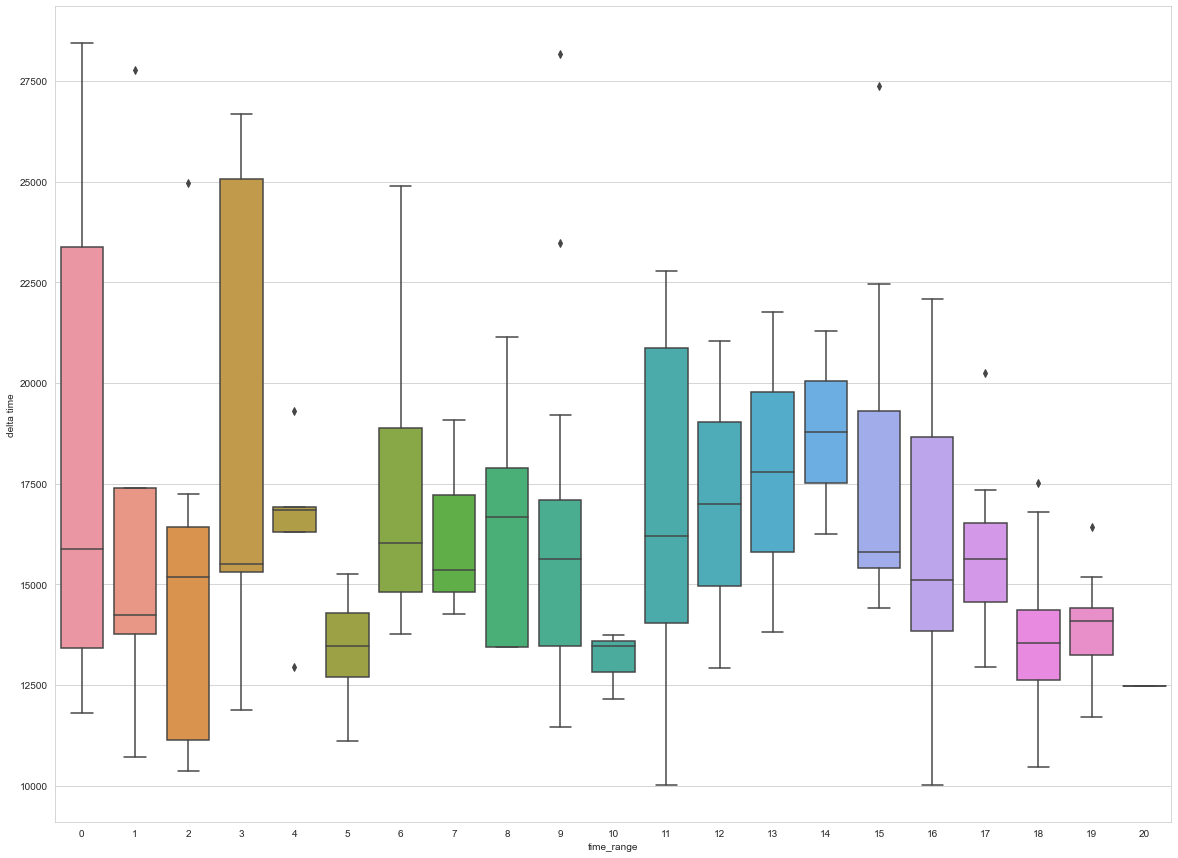

In [18]:
import seaborn as sns 
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.boxplot("time_range", "delta_t", data=df_out)
plt.xlabel("time_range") # Set text for the x axis
plt.ylabel("delta time")# Set text for y axis
plt.show()

Text(0, 0.5, 'Travel time')

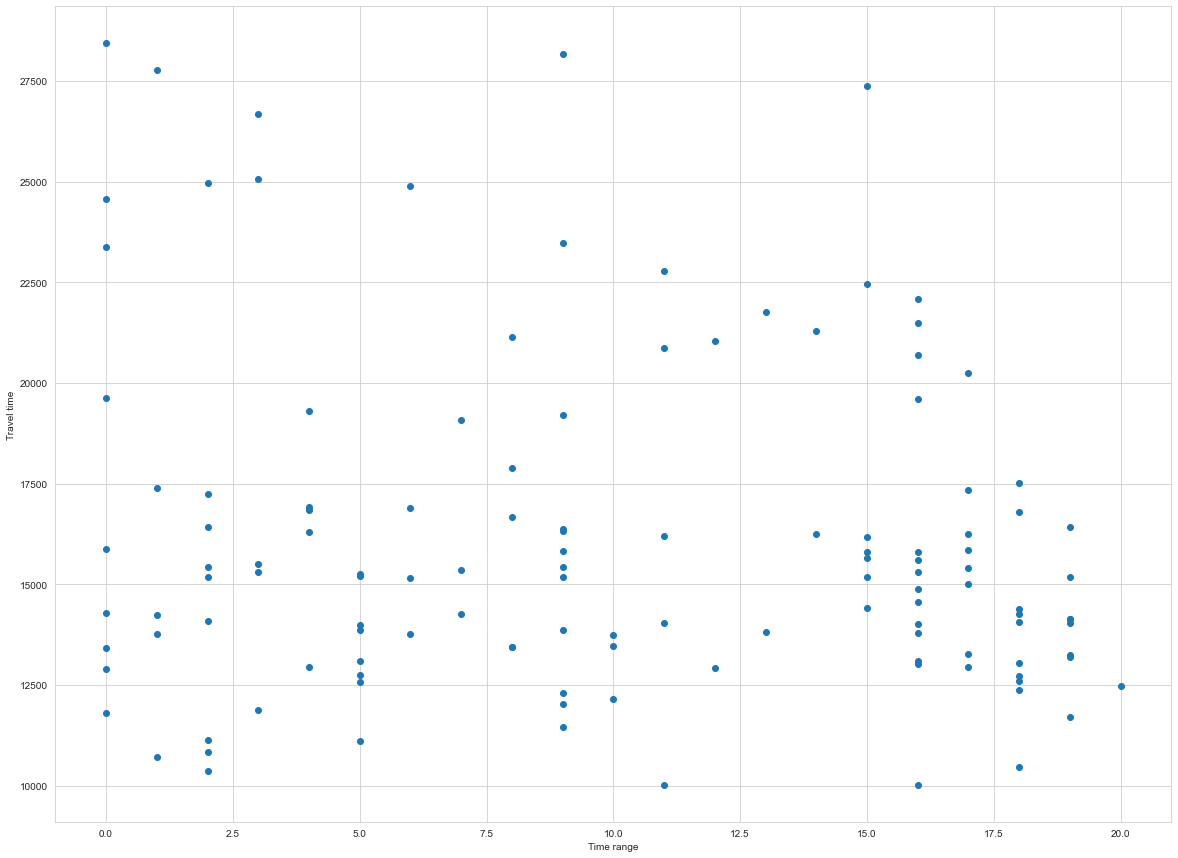

In [42]:
plt.figure(figsize=(20,15))
plt.scatter(df_out["time_range"],df_out["delta_t"])
plt.xlabel("Time range")
plt.ylabel("Travel time")

In [ ]:
all_clean = tt._clean_outlier(df_out)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


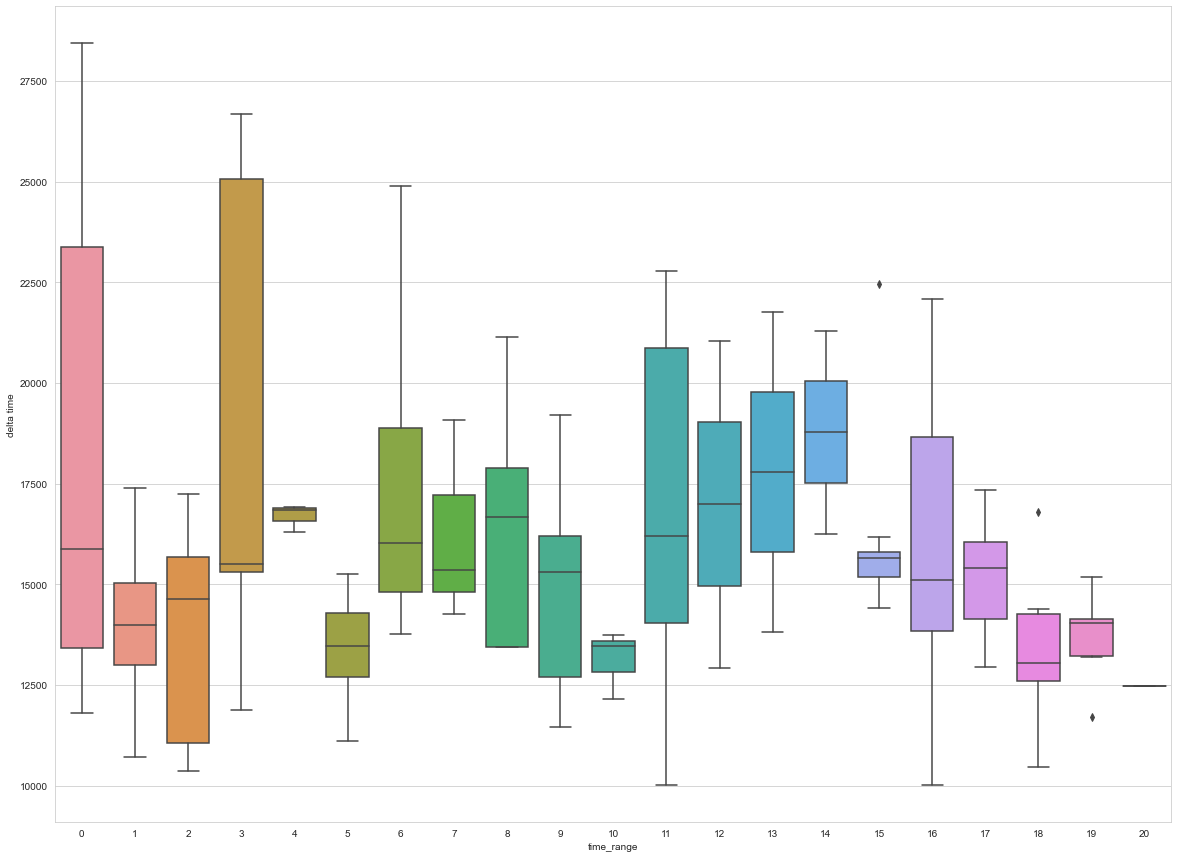

In [53]:
import seaborn as sns 
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
sns.boxplot("time_range", "delta_t", data=all_clean)
plt.xlabel("time_range") # Set text for the x axis
plt.ylabel("delta time")# Set text for y axis
plt.show()

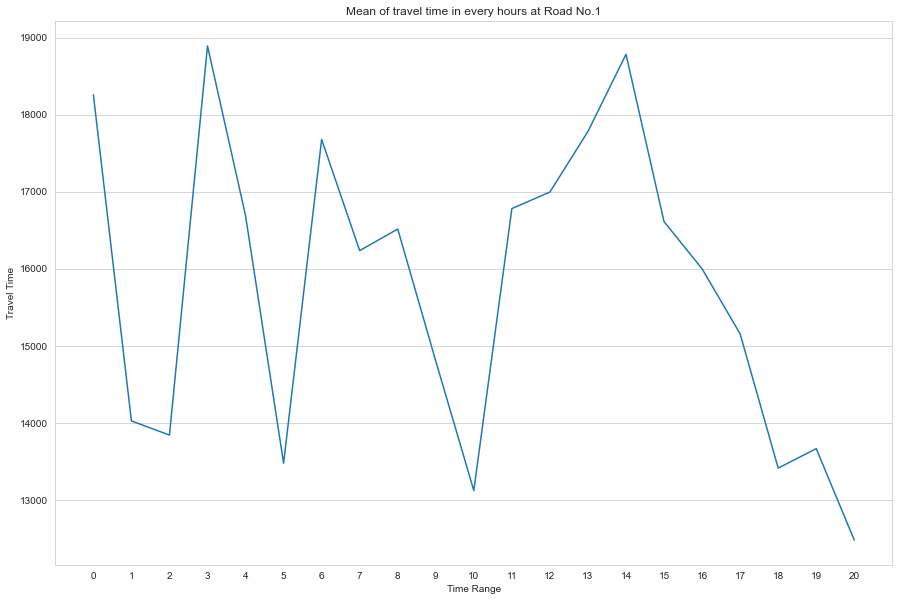

In [72]:
avr = []
hour = list(set(all_clean))
for hr in hour :
    avr.append( all_clean[all_clean["time_range"] == hr].mean()["delta_t"])

plt.figure(figsize=(15,8))
plt.plot(hour,avr)
plt.xlabel("Time Range")
plt.ylabel("Travel Time")
plt.title("Mean of travel time in every hours at Road No.1")
plt.xticks(hour)
plt.grid(axis="x")
plt.show()

